# Set for jupyter notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms
import os
import random
from PIL import Image

In [3]:
from modules.dataset import get_loader
from modules.utils import imsshow, imgshow

In [26]:
RV = [85]
MYO = [170]
LV = [255]

train_loader = get_loader(image_root_path='./ACDC-2D-All/train/', batch_size=32, mode='train')
# val_loader = get_loader(image_root_path='./ACDC-2D-All/val/', batch_size=32, mode='val')
# test_loader = get_loader(image_root_path='./ACDC-2D-All/test/', batch_size=32, mode='test')

image count in train path :1394


torch.Size([32, 1, 256, 256])
torch.Size([32, 3, 256, 256])


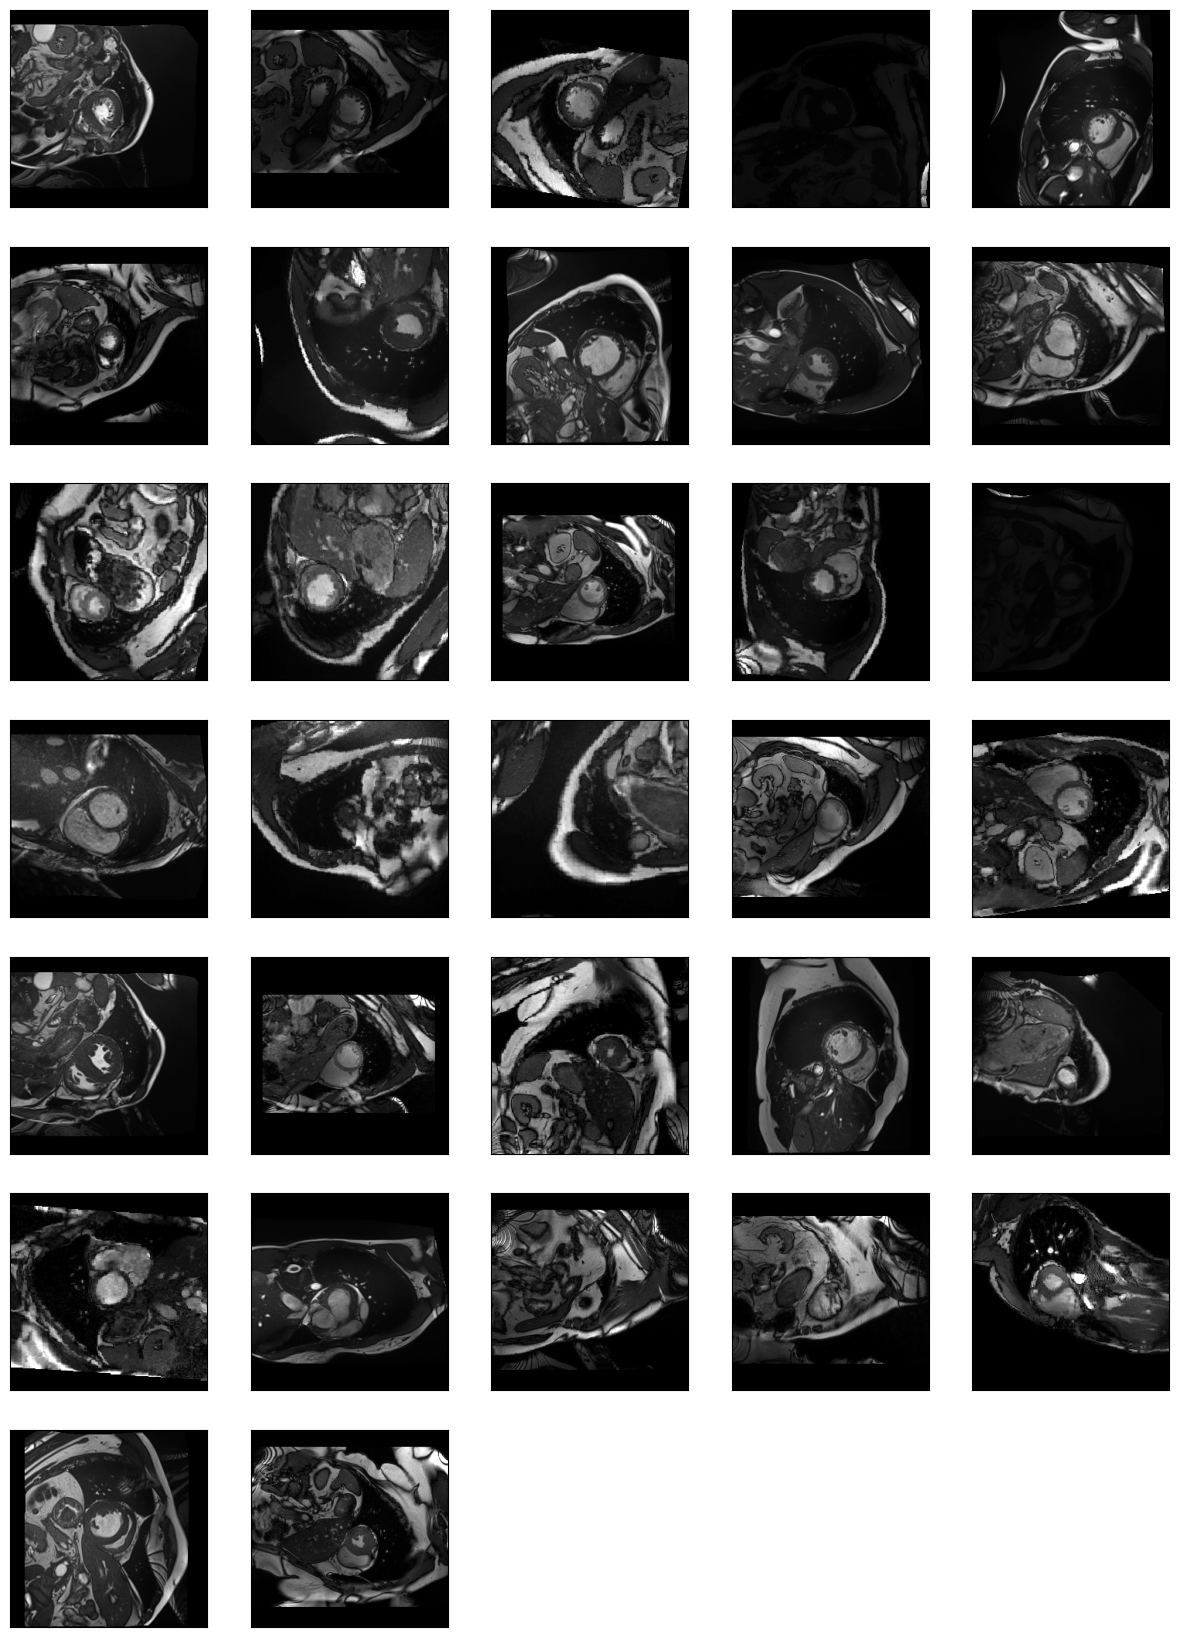

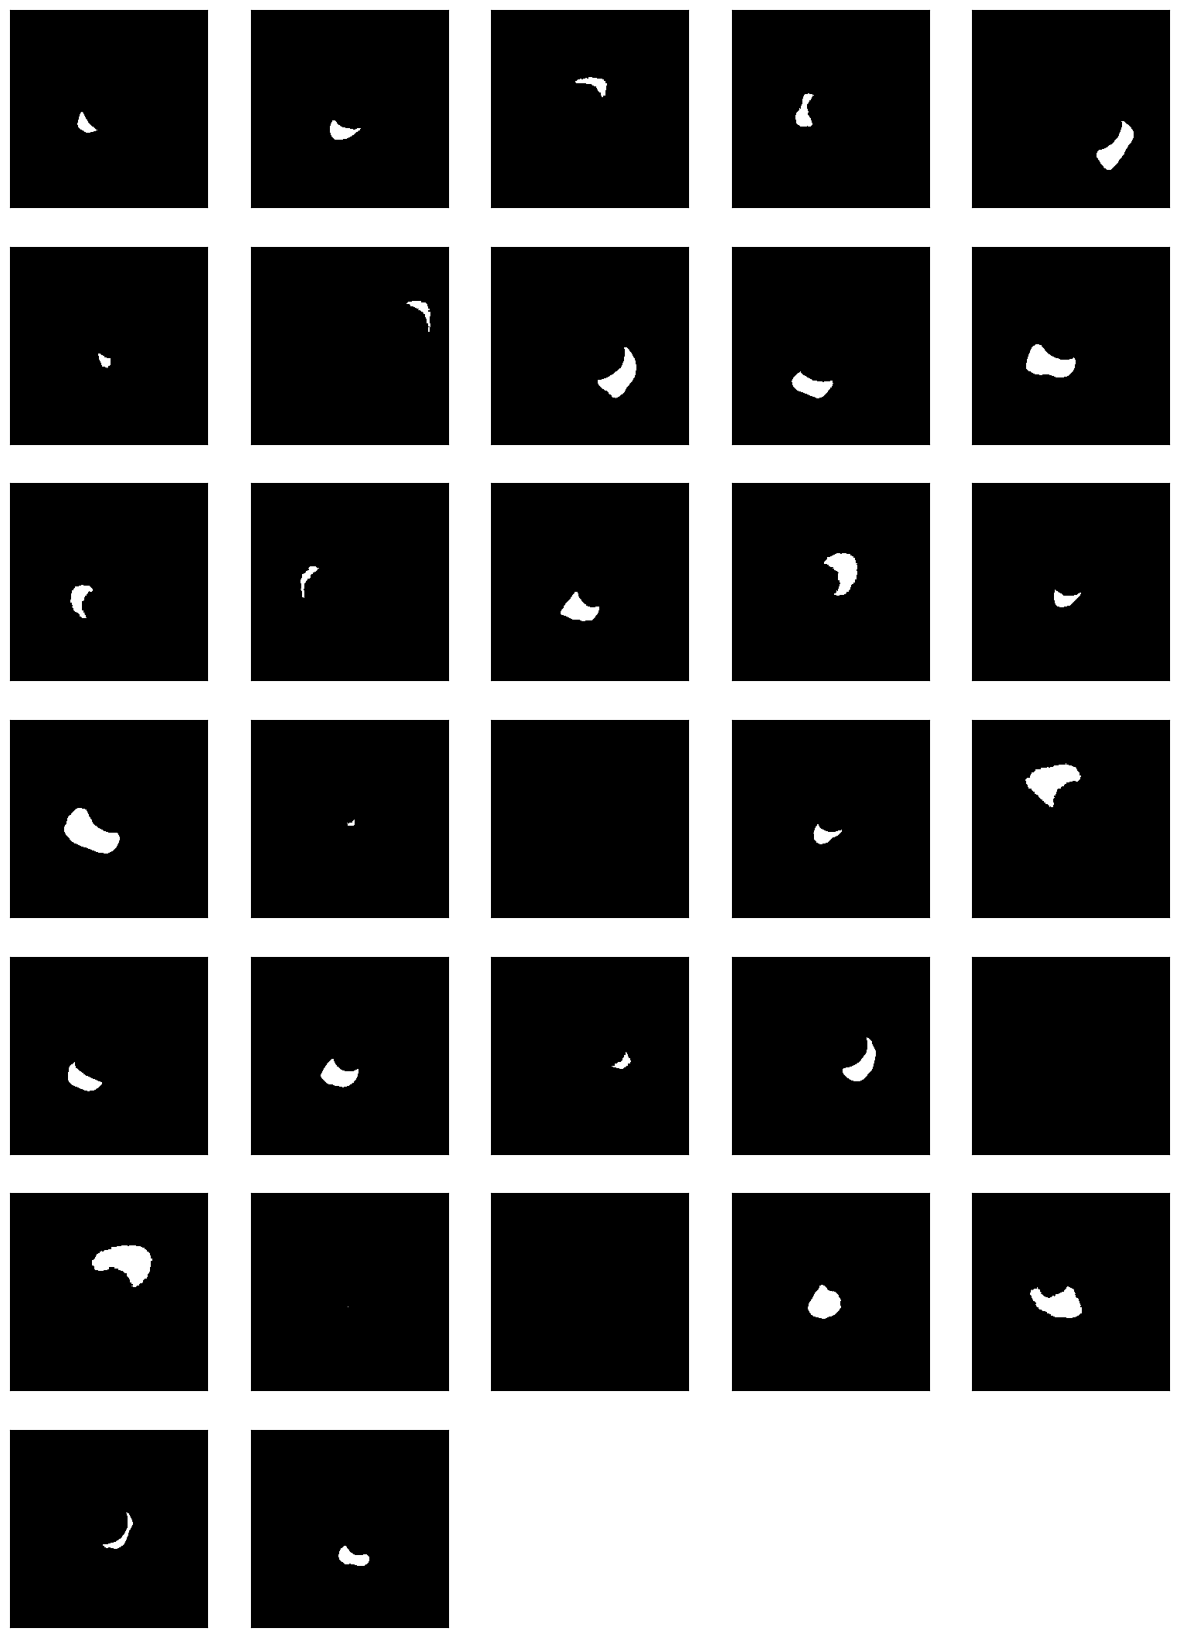

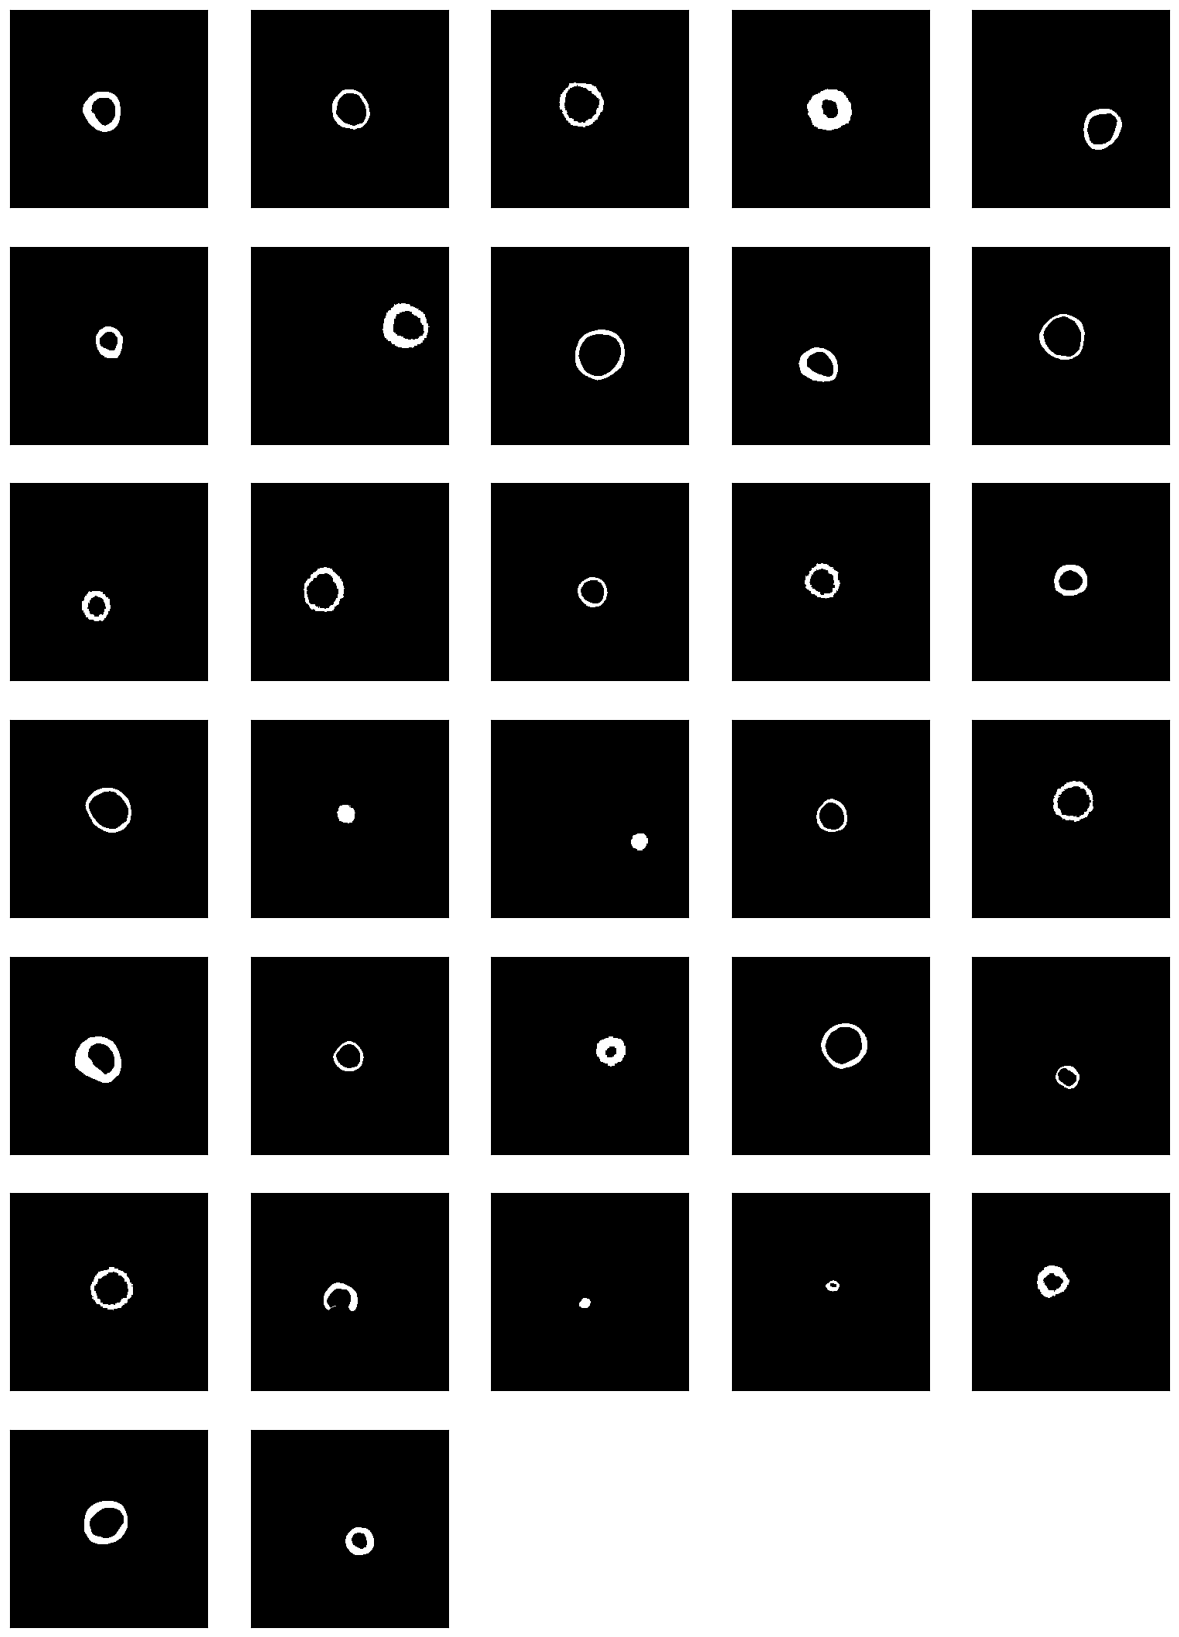

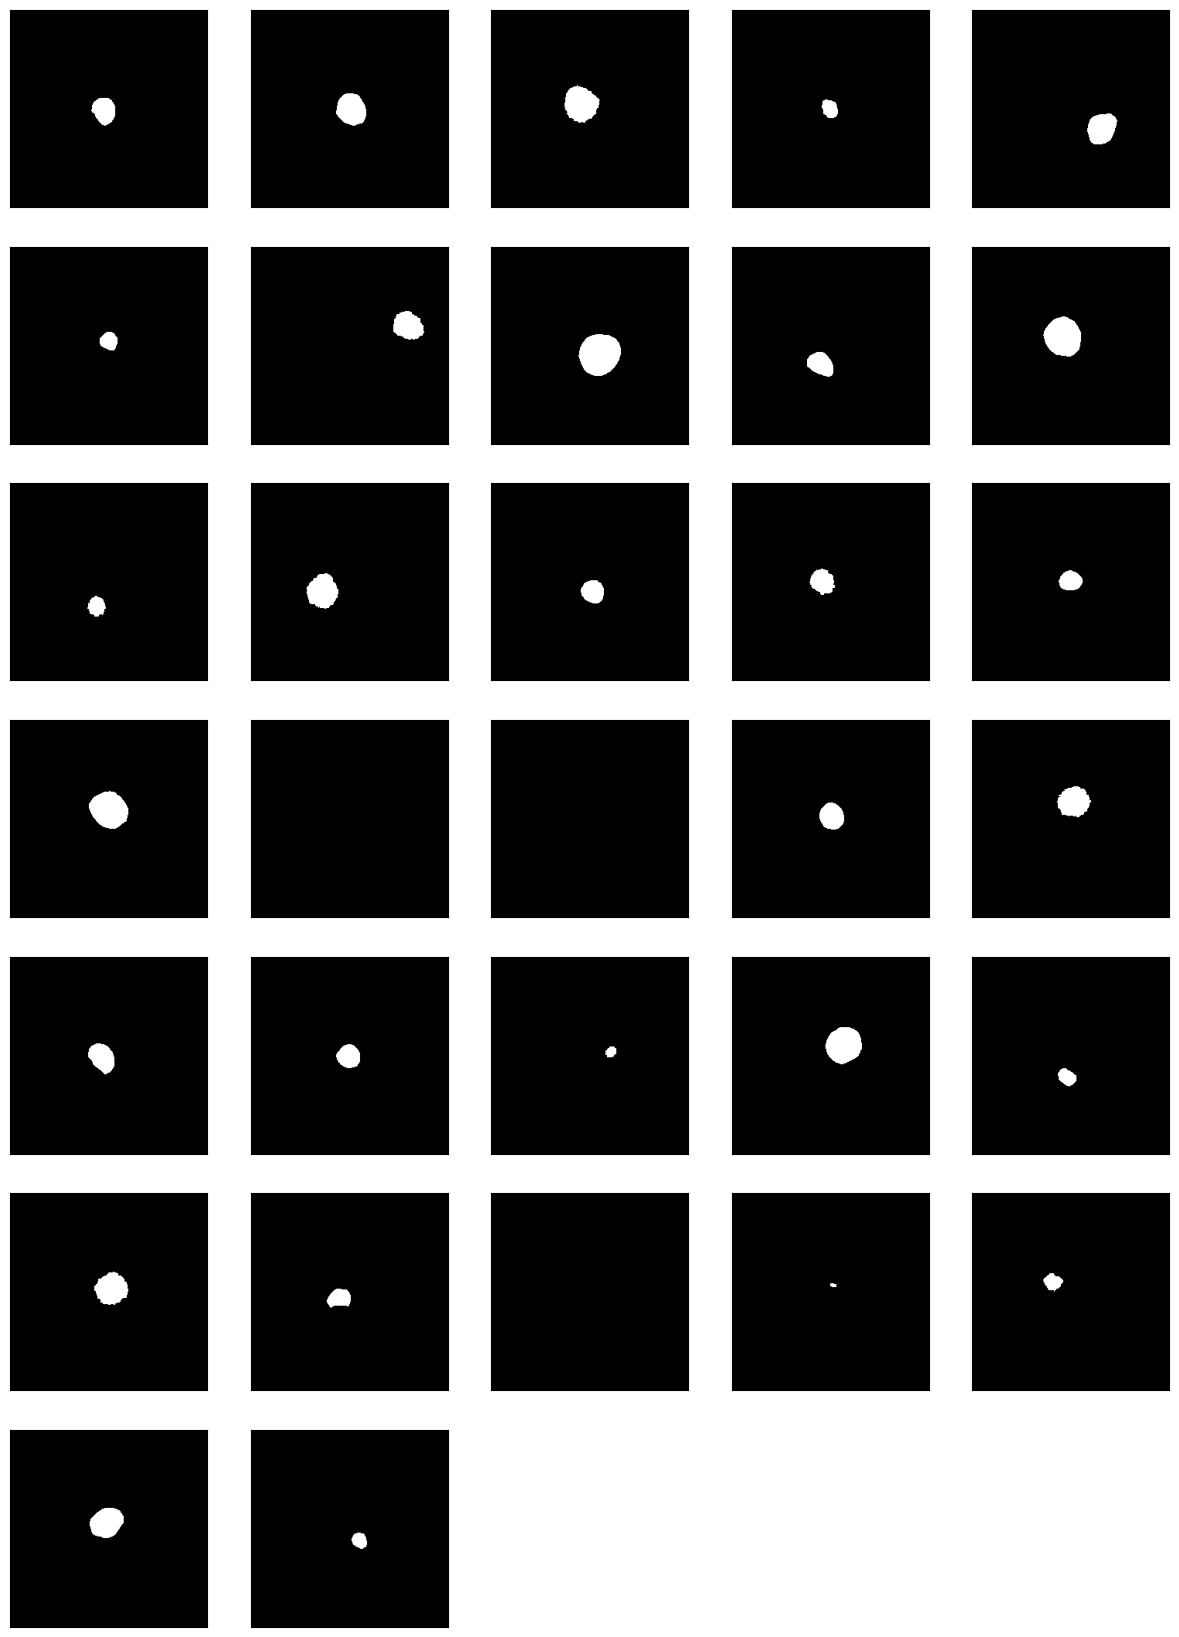

In [35]:
import itertools

def fetch_batch_sample(loader, idx):
    batch = next(itertools.islice(loader, idx, None))
    return batch

batch = next(itertools.islice(train_loader, 0, None))
image, seg_gt = batch
print(image.shape)
print(seg_gt.shape)
imsshow(image[:,0,  :, :], cmap='gray')
imsshow(seg_gt[:,0, :, :], cmap='gray')
imsshow(seg_gt[:,1, :, :], cmap='gray')
imsshow(seg_gt[:,2, :, :], cmap='gray')

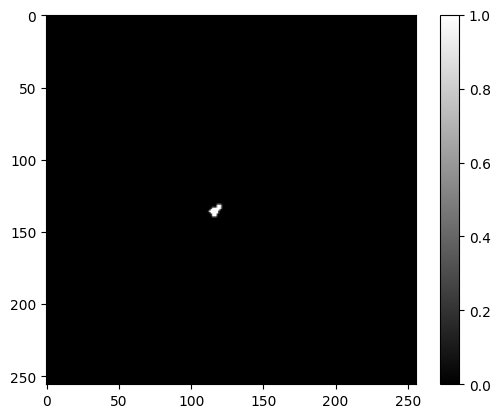

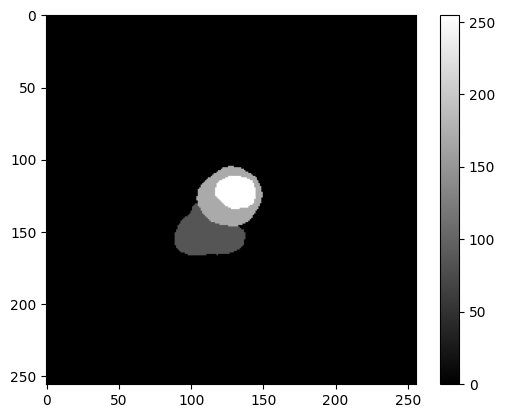

In [32]:
imgshow(seg_gt[2][2], cmap='gray')
img = np.array(Image.open("ACDC-2D-All/test/GT/patient052_09_3.png"))
imgshow(img, cmap='gray')

In [36]:
unique, count = np.unique(seg_gt[2][1], return_counts=True)

# Print the results
for u, c in zip(unique, count):
    print("Number of {} in the array: {}".format(u, c))

Number of 0.0 in the array: 64587
Number of 1.0 in the array: 949


In [11]:
from modules.utils import mask_to_onehot
mask = Image.open("/data/shengkuan/project2/ACDC-2D-All/train/GT/patient004_01_1.png")
print(mask.size)
mask = np.expand_dims(mask, axis=0)
print(mask.shape)
mask = mask_to_onehot(mask, [[85], [170], [255]])
print(mask.shape)

(256, 256)
(1, 256, 256)
(3, 256, 256)


0.0


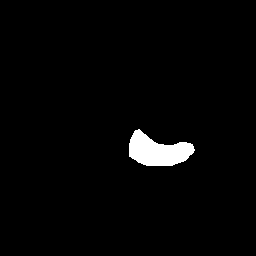

0.0


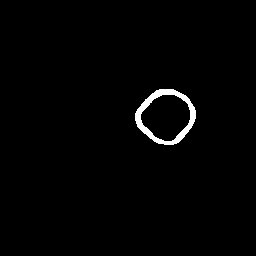

0.0


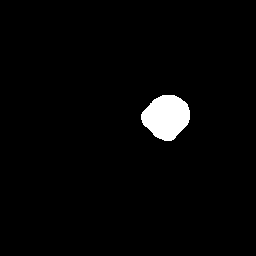

In [13]:
for i in range(mask.shape[0]):
    # 选择[0, 1]维度作为图片
    img_arr = mask[i,:,:]
    
    # 将numpy数组转换为PIL Image
    print(img_arr.min())
    img = Image.fromarray(np.uint8(img_arr * 255))
    
    # 打印图片
    img.show()